In [141]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import matplotlib
import sklearn

# Load data
data source: https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/

In [142]:
!wget https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a9a

--2023-08-26 13:57:37--  https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a9a
Resolving www.csie.ntu.edu.tw (www.csie.ntu.edu.tw)... 140.112.30.26
Connecting to www.csie.ntu.edu.tw (www.csie.ntu.edu.tw)|140.112.30.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2329875 (2.2M)
Saving to: ‘a9a.2’

a9a.2               100%[===================>]   2.22M  81.3KB/s    in 24s     

2023-08-26 13:58:06 (95.1 KB/s) - ‘a9a.2’ saved [2329875/2329875]



In [143]:
!head a9a  # we have a sparse adta
# LibSVM format:  label  coordId:value coordId:value coordId:value coordId:value coordId:value 

-1 3:1 11:1 14:1 19:1 39:1 42:1 55:1 64:1 67:1 73:1 75:1 76:1 80:1 83:1 
-1 5:1 7:1 14:1 19:1 39:1 40:1 51:1 63:1 67:1 73:1 74:1 76:1 78:1 83:1 
-1 3:1 6:1 17:1 22:1 36:1 41:1 53:1 64:1 67:1 73:1 74:1 76:1 80:1 83:1 
-1 5:1 6:1 17:1 21:1 35:1 40:1 53:1 63:1 71:1 73:1 74:1 76:1 80:1 83:1 
-1 2:1 6:1 18:1 19:1 39:1 40:1 52:1 61:1 71:1 72:1 74:1 76:1 80:1 95:1 
-1 3:1 6:1 18:1 29:1 39:1 40:1 51:1 61:1 67:1 72:1 74:1 76:1 80:1 83:1 
-1 4:1 6:1 16:1 26:1 35:1 45:1 49:1 64:1 71:1 72:1 74:1 76:1 78:1 101:1 
+1 5:1 7:1 17:1 22:1 36:1 40:1 51:1 63:1 67:1 73:1 74:1 76:1 81:1 83:1 
+1 2:1 6:1 14:1 29:1 39:1 42:1 52:1 64:1 67:1 72:1 75:1 76:1 82:1 83:1 
+1 4:1 6:1 16:1 19:1 39:1 40:1 51:1 63:1 67:1 73:1 75:1 76:1 80:1 83:1 


In [144]:
# see  https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_svmlight_file.html
from joblib import Memory
from sklearn.datasets import load_svmlight_file
mem = Memory("./mycache")
from sklearn.preprocessing import normalize

@mem.cache
def get_data(filePath):
    data = load_svmlight_file(filePath)
    return data[0], data[1]

X, y = get_data("a9a")
n, d =X.shape
# X = normalize(X, norm='l2', axis=1) # normalize such that each row will have \|\cdot\|_2 = 1
# y = y.reshape(-1,1)
print("We have %d samples, each has up to %d features"%(n,d))

________________________________________________________________________________
[Memory] Calling __main__--tmp-ipykernel-1673141378.get_data...
get_data('a9a')
_________________________________________________________get_data - 7.6s, 0.1min
We have 32561 samples, each has up to 123 features


/tmp/ipykernel_94585/1673141378.py:12: UserWarning: Persisting input arguments took 3.70s to run.If this happens often in your code, it can cause performance problems (results will be correct in all cases). The reason for this is probably some large input arguments for a wrapped function.
  X, y = get_data("a9a")


In [145]:
X[0,:].indices, X[0,:].data  # we should normalize data, but let's keep it for the assignment :)

(array([ 2, 10, 13, 18, 38, 41, 54, 63, 66, 72, 74, 75, 79, 82],
       dtype=int32),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

# The Problem

## Hinge-square loss

$$
F_H(w) = \frac1n \sum_{i=1}^n \left(  \max \{ 0 ,y_i - w^T x_i \}  \right)^2
$$

$$
\nabla F_H(w) = \frac1n \sum_{i=1}^n\begin{cases} 
      0 & y_i x_i^T w \geq 1 \\
      -2 y_i(1-y_i x_i^T w)x_i & o.w. \\
   \end{cases}
$$
In Matrix Form: 
$$
\nabla F_H(w) = -\frac{2}{n}X^T [y \cdot (1-yXw)\cdot \zeta] 
$$
where $\zeta \in R^n$ and $\zeta_i= 1$ if  $y_i x_i^T w < 1$ and zero o.w. and (a$\cdot$b) is element wise multiplication


## Logistic regression
$$
F_L(w) = \frac1n \sum_{i=1}^n \log(1+e^{-y_i x_i^T w})
$$
$$
\nabla F_L(w) =   \frac1n \sum_{i=1}^n 
\frac{\exp(-y_ix_i^Tw)}{(1+\exp(-y_ix_i^Tw))} (-y_i) x_i 
$$


# Task #1
For each function, decide if the function is convex, and also find a smoothness parameter $L$ such that

$$
 \forall w,w' \in R^d: \quad \| \nabla F(w) - \nabla F(w') \| \leq L \|w - w'\|
$$

TODO

# Task #2
Implement (without for loops) following functions

In [146]:
np.random.seed(0)
# w = np.random.randn(d)
def FH(X,y,w):
  h = X.dot(w)
  a = np.multiply(y,h)
  error = (1-a)
  return np.mean(np.maximum(0,error)**2) 

def gradFH(X,y,w):
  h = X.dot(w)
  a = np.multiply(y,h)
  error =  (1-a)
  error = np.where(error<0,0,error)
  derror = 2*X.T.dot(-y*error)
  return (derror)/X.shape[0]


def FL(X, y, w):
    return np.mean(np.log(1+np.exp(-y*X.dot(w))))
def gradFL(X, y, w):
    """ Compute the function gradient of Logisitic """
    r = -y*X.dot(w)
    expr = np.exp(r);
    grad= X.T.dot(-expr*y/(1+expr))   
    return grad/X.shape[0]


# Task #3
Implement gradient descent algorithm that will use the step-size $\gamma = \frac1L$ and run it for both function.
Then make two plots, 1 showing the evolution of $\{F_\cdot (w_t)\}$ and the second one (in y-log scale) showing $\{\| \nabla F_\cdot (w_t)\|^2\}$ 

In [147]:
np.random.seed(0)
def GD(X,y,w,gamma,F,dF):
  hist = [] # append here function value and square norm of gradient 
            # for initial point and also after each iteration
  g = dF(X, y, w)
  hist.append([F(X, y, w),np.linalg.norm(g)**2])
  for it in range(1000):
    # Find the gradient at w
      g = dF(X, y, w)
    # move along - g with gamms step
      w = w - gamma * g
      hist.append([F(X, y, w),np.linalg.norm(g)**2])
  hist=np.array(hist)  
  return hist


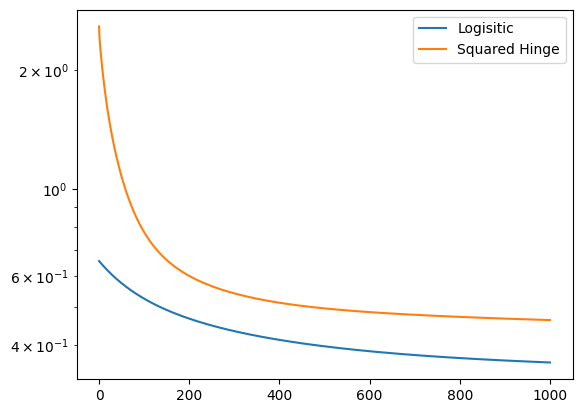

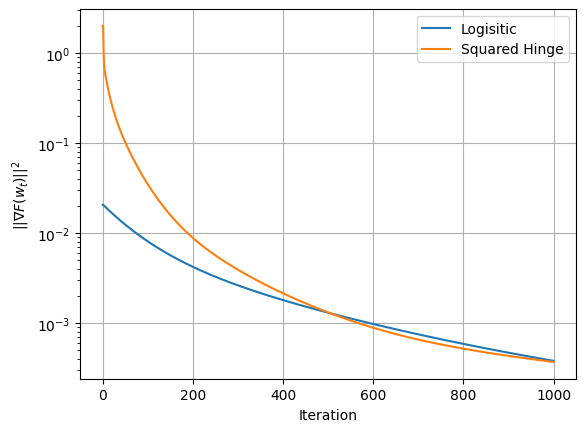

In [148]:
w = np.random.randn(d)
gamma = .1
h1 = GD(X,y,w,gamma,FL,gradFL)
h2 = GD(X,y,w,gamma,FH,gradFH)
plt.semilogy(h1[:,0],label="Logisitic")
plt.semilogy(h2[:,0],label="Squared Hinge")
plt.legend()
plt.show()
plt.semilogy(h1[:,1],label="Logisitic")
plt.semilogy(h2[:,1],label="Squared Hinge")
plt.ylabel(r"$||\nabla F(w_t)||^2$");plt.xlabel("Iteration")
plt.legend()
plt.grid(True)

# Task #4
Implement gradient descent algorithm that adaptive step-size strategy as discussed in first lecture, using sufficient decrease condition. Show how step-size is changing over-time for the two functions and give explanation for the observed behaviour.


*  There are multiple strategies to find a good step-size automatically.
*  One such a strategy is Armijo rule https://en.wikipedia.org/wiki/Wolfe_conditions#Armijo_rule_and_curvature
*  Another strategy from Nesterov http://www.optimization-online.org/DB_FILE/2007/09/1784.pdf equation (3.1) is just based on the sufficient decrese condition. 

## sufficient descrease
*  If we have some estimate $\tilde L$ that is larger than the true $L$, we know that step-size $\gamma = \frac1 {\tilde L}$ would lead to a new point $w^+$ such that
$$
F(w^+) \leq F(w) - \frac1{2\tilde L} \| \nabla F(w) \|^2
$$
where $w^+$ would be the next point

*  We have two options, if the inequality above is satisfies, our step-size was ok and we can take the step (and decrease $\tilde L$, e.g. $\tilde L := 0.5 \cdot \tilde L$)

*  or if it is NOT valid, we know, our estimate was bad, so we should *NOT* take the step and e.g. double $\tilde L$, i.e. $\tilde L := 2 \cdot \tilde L $



In [149]:
def GD_dyn(X,y,w,L,f,df):
  """ Gradient Descent with dynamic step size based on sufficient decrease """
  hist_dyn = []

  # Implement 
  for it in range(1000):
      
    gamma = 1 / L
    
    # compute gradient
    g = df(X, y, w)
    
    # compute trial point using step-size gamma
    w_t = w - gamma * g
     
    # check sufficient decrease and decide what to do next
    Sufficient_decrease = f(X,y,w_t) <= f(X,y,w) - gamma/2 * np.linalg.norm(g)**2
    if Sufficient_decrease == True:
      w = w_t
      L = L * 0.8
    else:
      L = L * 1.2
    hist_dyn.append([f(X, y, w),np.linalg.norm(g)**2,gamma])
  # show evolution of step-size 
  # show evolution of function value and square of norm of gradient
  return np.array(hist_dyn)



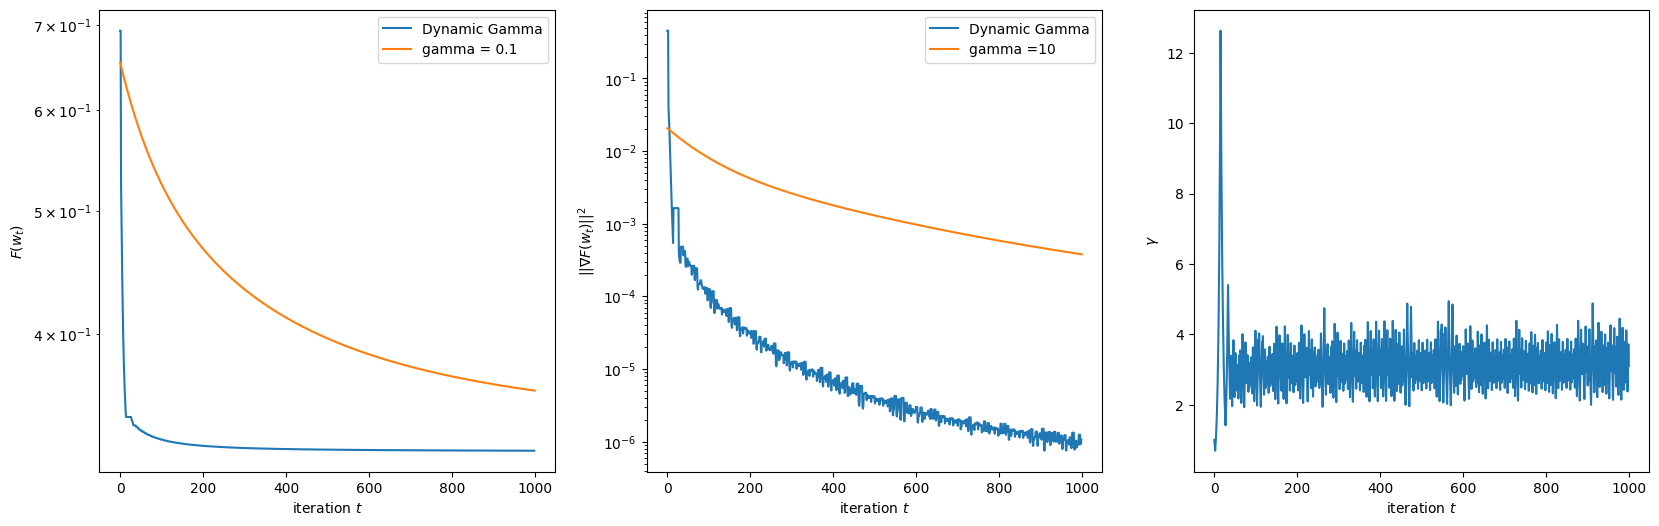

In [150]:
# logistic
w = np.zeros(d)
hist_dyn = GD_dyn(X,y,w,1,FL,gradFL)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3);fig.set_size_inches(20, 6)
ax1.semilogy(hist_dyn[:,0],label='Dynamic Gamma');ax1.set_ylabel(r"$F(w_t)$");ax1.set_xlabel(r"iteration $t$")  
ax1.semilogy(h1[:,0],label = 'gamma = 0.1');ax1.set_ylabel(r"$F(w_t)$");ax1.set_xlabel(r"iteration $t$")  
ax2.semilogy(hist_dyn[:,1],label='Dynamic Gamma');ax2.set_ylabel(r"$||\nabla F(w_t)||^2$");ax2.set_xlabel(r"iteration $t$")
ax2.semilogy(h1[:,1],label ='gamma =10');ax2.set_ylabel(r"$||\nabla F(w_t)||^2$");ax2.set_xlabel(r"iteration $t$")
ax3.plot(hist_dyn[:,2]);ax3.set_ylabel(r"$\gamma$");ax3.set_xlabel(r"iteration $t$")
ax1.legend()
ax2.legend()

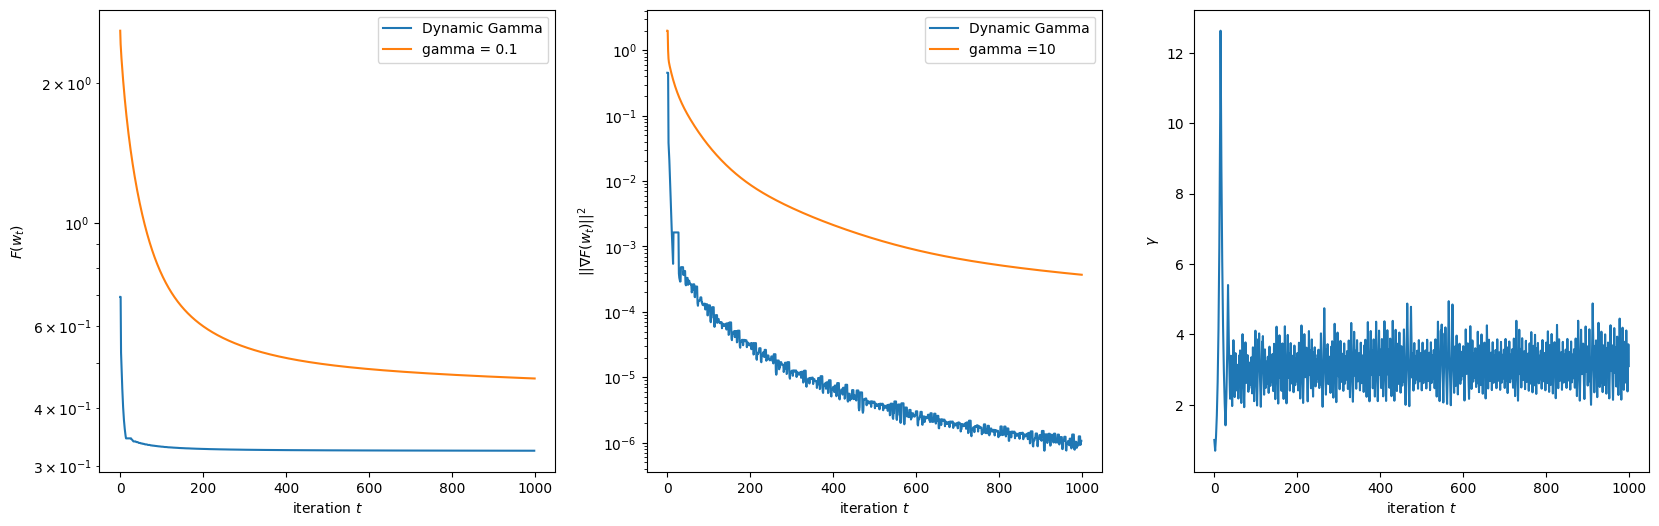

In [151]:
# Squared Hinge
w = np.zeros(d)
hist_dyn = GD_dyn(X,y,w,1,FL,gradFL)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3);fig.set_size_inches(20, 6)
ax1.semilogy(hist_dyn[:,0],label='Dynamic Gamma');ax1.set_ylabel(r"$F(w_t)$");ax1.set_xlabel(r"iteration $t$")  
ax1.semilogy(h2[:,0],label = 'gamma = 0.1');ax1.set_ylabel(r"$F(w_t)$");ax1.set_xlabel(r"iteration $t$")  
ax2.semilogy(hist_dyn[:,1],label='Dynamic Gamma');ax2.set_ylabel(r"$||\nabla F(w_t)||^2$");ax2.set_xlabel(r"iteration $t$")
ax2.semilogy(h2[:,1],label ='gamma =10');ax2.set_ylabel(r"$||\nabla F(w_t)||^2$");ax2.set_xlabel(r"iteration $t$")
ax3.plot(hist_dyn[:,2]);ax3.set_ylabel(r"$\gamma$");ax3.set_xlabel(r"iteration $t$")
ax1.legend()
ax2.legend()